In [1]:
%matplotlib inline

import os
import pandas as pd

from ram import config

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
# View all available strategies
print(RunManager.get_run_names('StatArbStrategy'))

    RunName     RunDate Completed  \
0  run_0068  2018-03-06      True   
1  run_0069  2018-03-07      True   
2  run_0070  2018-03-19      True   

                                      Description  
0                          Sector 20, version 002  
1  Sector 20, version 2 rerun with univ filtering  
2                    Sector 20, post refactor run  


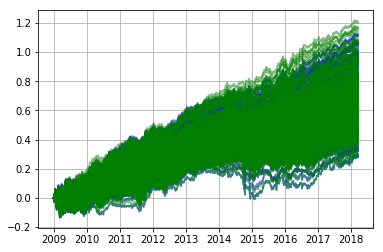

In [17]:
rm1 = RunManager('StatArbStrategy', 'run_0069', 2009, test_periods=0)
rm2 = RunManager('StatArbStrategy', 'run_0070', 2009, test_periods=0)

rm1.import_return_frame()
rm2.import_return_frame()

plt.figure()
plt.plot(rm1.returns.cumsum(), 'b', alpha=.5)
plt.plot(rm2.returns.cumsum(), 'g', alpha=.5)

plt.grid()
plt.show()

In [24]:
comb1.params

{'training_epochs': 1, 'training_freq': 'm', 'training_periods': 12}

In [25]:
comb1 = CombinationSearch()
comb1.params['training_epochs'] = 30
comb1.add_run(rm1)
comb1.start()

  0%|          | 0/30 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 30/30 [05:35<00:00, 10.62s/it]


In [26]:
comb2 = CombinationSearch()
comb2.params['training_epochs'] = 30
comb2.add_run(rm2)
comb2.start()

  0%|          | 0/30 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 30/30 [05:33<00:00, 11.04s/it]


In [27]:
df = rollup_returns(comb1.best_results_returns)
df['year'] = df.sum(axis=1)
df

Qtr,1,2,3,4,year
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.077520,-0.001738,0.076335,0.013897,0.166014
2011,0.049939,0.019544,-0.015462,0.077043,0.131064
2012,-0.022192,0.012102,0.009315,0.063113,0.062338
2013,0.007856,0.030664,0.022149,0.003395,0.064065
2014,0.045167,0.002243,-0.025337,0.009122,0.031194
2015,0.012479,0.034618,-0.020513,0.060618,0.087201
2016,-0.019645,0.001841,-0.003479,0.033506,0.012223
2017,0.017954,0.038278,-0.009996,0.031231,0.077466


In [28]:
df = rollup_returns(comb2.best_results_returns)
df['year'] = df.sum(axis=1)
df

Qtr,1,2,3,4,year
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.079208,-0.007686,0.084363,0.011635,0.167519
2011,0.050105,0.000153,-0.007564,0.079134,0.121827
2012,-0.028774,-0.001213,0.019749,0.069048,0.058810
2013,0.010466,0.041087,0.028731,0.006731,0.087015
2014,0.049674,-0.020219,-0.024212,0.022526,0.027770
2015,0.032081,0.029038,-0.017893,0.068583,0.111809
2016,-0.012815,0.020274,0.010146,0.043058,0.060663
2017,0.017625,0.023017,-0.000962,0.031080,0.070760


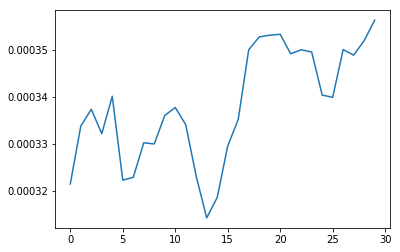

In [30]:
plt.figure()
plt.plot(comb2.epoch_stats.Mean)
plt.show()

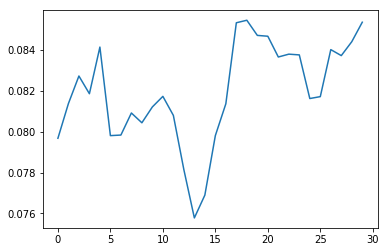

In [31]:
plt.figure()
plt.plot(comb2.epoch_stats.Sharpe)
plt.show()

In [32]:
comb2 = CombinationSearch()
comb2.params['training_epochs'] = 500
comb2.add_run(rm2)
comb2.start()

  0%|          | 0/500 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 500/500 [1:34:46<00:00, 11.78s/it]


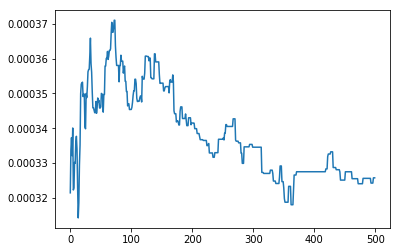

In [33]:
plt.figure()
plt.plot(comb2.epoch_stats.Mean)
plt.show()

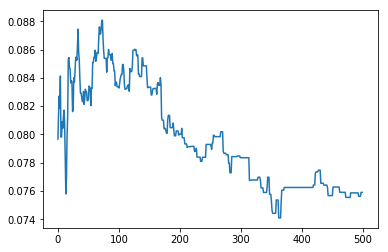

In [34]:
plt.figure()
plt.plot(comb2.epoch_stats.Sharpe)
plt.show()

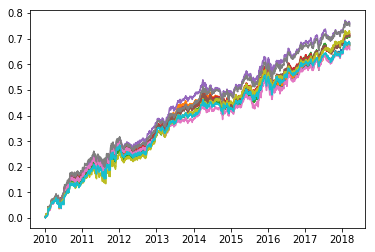

In [35]:
plt.figure()
plt.plot(comb2.best_results_returns.cumsum())
plt.show()

In [36]:
df = rollup_returns(comb2.best_results_returns)
df['year'] = df.sum(axis=1)
df

Qtr,1,2,3,4,year
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.073344,0.006743,0.071208,0.004335,0.155629
2011,0.042070,0.007237,-0.005641,0.076417,0.120083
2012,-0.030414,-0.002671,0.032154,0.059275,0.058345
2013,0.009551,0.049040,0.037354,0.004982,0.100927
2014,0.048419,-0.032125,-0.017858,-0.003571,-0.005135
2015,0.025187,0.038219,-0.025464,0.078916,0.116858
2016,-0.018837,0.022127,0.003700,0.036600,0.043590
2017,0.012844,0.030046,-0.007998,0.029216,0.064109
